In [59]:
import h5py
import pandas as pd
import numpy as np
from haversine import haversine
from tqdm import tqdm
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, ElasticNetCV, LassoCV, Lasso
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, RobustScaler, scale
from distfit import distfit
from sklearn.decomposition import PCA
from scipy.stats import boxcox 
import seaborn as sns 
from scipy.stats import skew 
from statistics import median
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import f_classif

In [3]:
nyc_health = pd.read_csv('nyc_healthdeserts_li.csv')
nyc_health

,TractFIPS,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,...,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,closest_education_nodes_travel_time,closest_food_nodes_travel_time,closest_worship_nodes_travel_time,physical_dist,transport_dist,LowIncomeTracts
0,36047009600,34.5,15.1,15.8,26.1,68.7,3.7,9.0,73.0,5.7,...,16.9,43.7,3.2,26.2,4.0,3.0,4.0,0.158174,0.498002,1
1,36047011600,28.0,16.9,11.3,29.6,74.5,4.4,7.9,61.0,6.8,...,15.9,46.8,4.0,32.2,7.0,3.0,7.0,0.377913,0.535944,1
2,36047046000,15.0,19.0,16.9,28.0,75.4,6.1,8.3,78.3,6.1,...,12.7,40.1,3.3,17.9,9.0,7.0,9.0,0.797871,0.617204,1
3,36005031400,13.8,22.0,18.1,31.8,78.5,8.1,9.1,86.0,6.3,...,10.6,35.4,3.3,11.9,4.0,11.0,4.0,0.679142,0.333808,0
4,36005042300,26.7,16.9,18.7,28.2,68.8,4.2,11.0,82.4,5.0,...,14.4,41.5,3.0,18.4,5.0,8.0,5.0,0.000000,0.412595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,36081113900,13.9,19.7,14.7,27.6,76.9,6.2,7.9,82.1,5.7,...,12.0,38.4,2.9,12.3,4.0,15.0,4.0,0.169904,0.249437,1
2113,36047058000,16.8,18.3,16.3,27.4,75.9,6.1,8.0,76.4,5.8,...,12.2,39.8,3.2,17.5,0.0,2.0,0.0,0.286232,0.000000,1
2114,36061013900,7.6,17.3,25.0,21.2,70.5,6.0,8.8,86.8,3.7,...,8.1,35.3,1.9,6.9,3.0,4.0,3.0,0.556792,0.324271,0
2115,36081041400,19.8,20.3,14.8,35.0,75.4,4.9,11.7,86.9,5.2,...,14.6,47.5,4.3,23.4,5.0,9.0,5.0,0.307807,0.339795,1


In [14]:
health_cols_raw = ['access2', 'arthritis', 'binge', 'bphigh', 'bpmed', 'cancer', 'casthma', 'cervical', 'chd', 'checkup', 'cholscreen', 'colon_screen', 'copd', 'corem', 'corew', 'csmoking', 'dental', 'depression', 'diabetes', 'ghlth', 'highchol', 'kidney', 'lpa', 'mammouse', 'mhlth', 'obesity', 'phlth', 'sleep', 'stroke', 'teethlost']
health_cols = [x.upper() +'_CrudePrev' for x in health_cols_raw]
health_cols_bool = [x +'_abovemed' for x in health_cols]
#desert_measures = ['education_time','food_time',
#                   'worship_time', 'physical_dist', 'transport_dist']
desert_measures = ['closest_education_nodes_travel_time','closest_food_nodes_travel_time',
                   'closest_worship_nodes_travel_time', 'physical_dist', 'transport_dist']

16.3


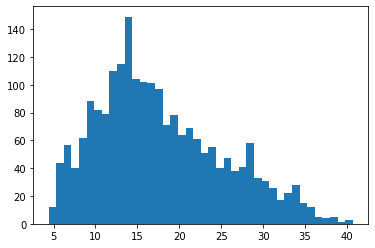

18.5


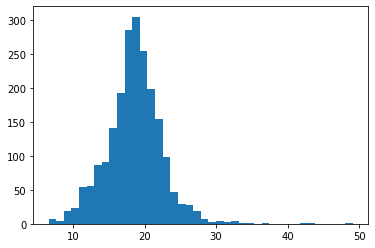

17.3


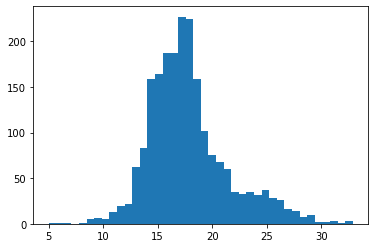

28.2


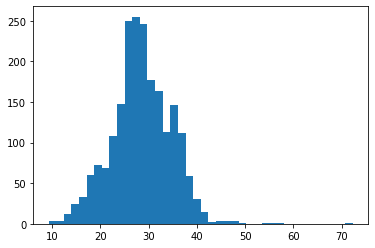

74.1


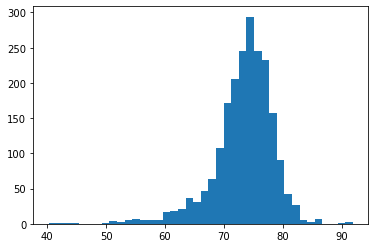

5.3


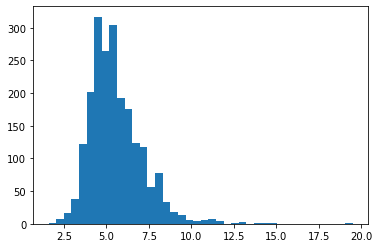

9.4


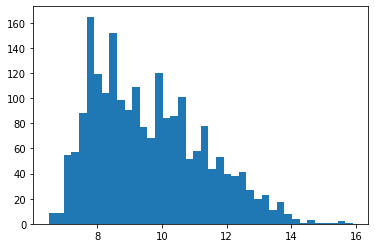

84.3


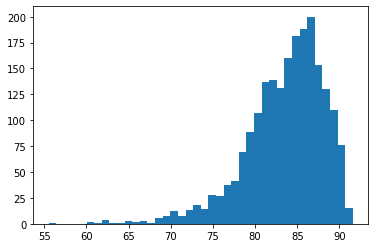

5.2


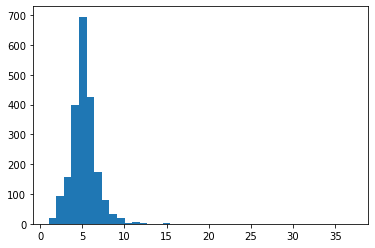

79.4


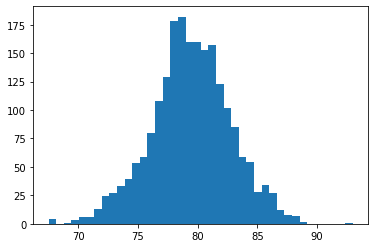

87.8


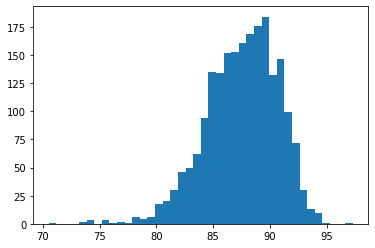

62.0


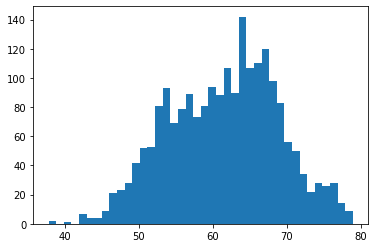

5.9


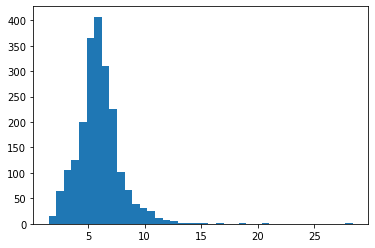

20.7


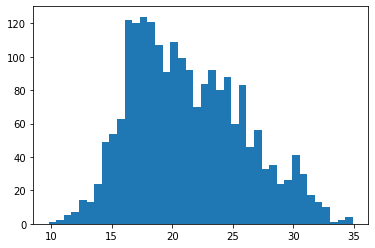

19.25


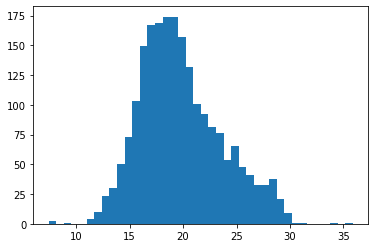

14.4


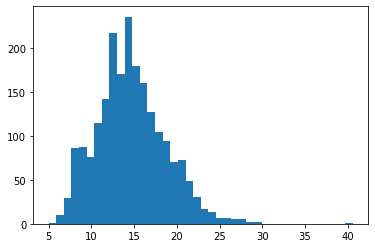

63.8


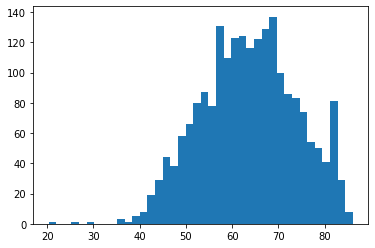

15.8


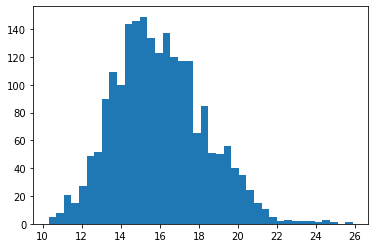

11.0


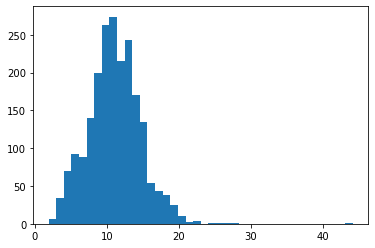

19.9


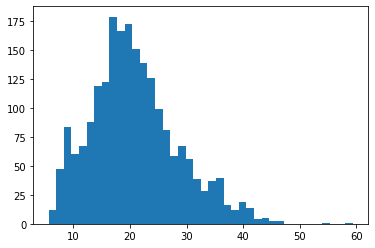

29.3


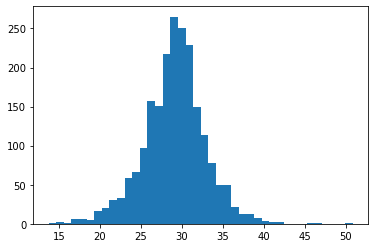

2.8


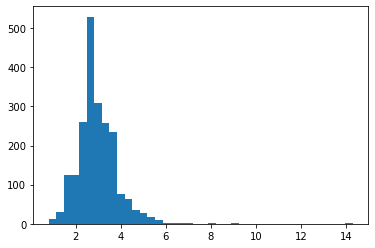

30.1


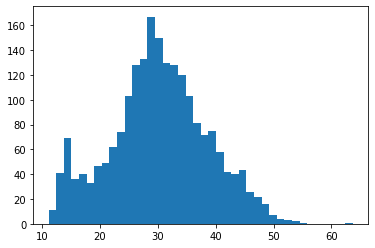

80.9


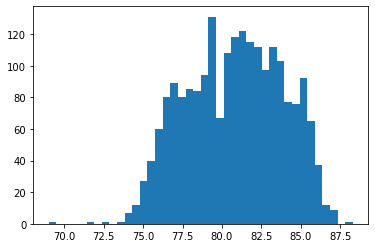

13.4


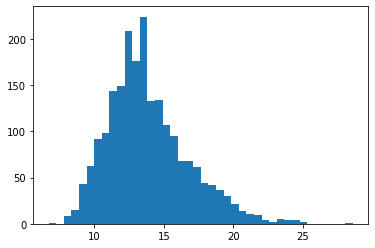

25.9


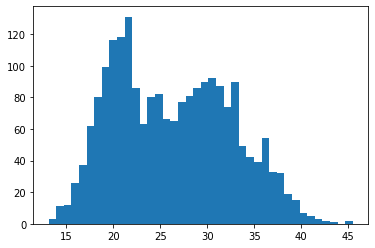

12.2


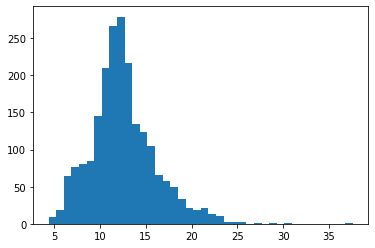

41.2


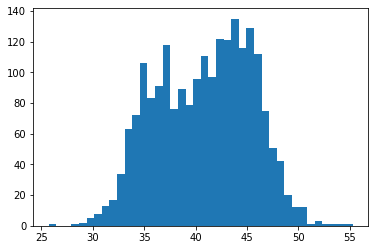

3.1


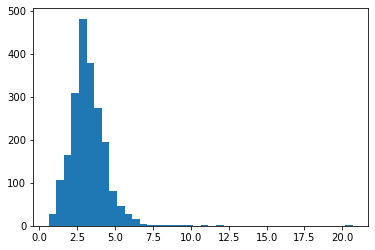

16.0


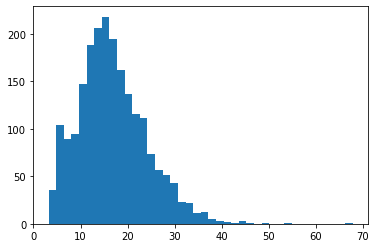

,TractFIPS,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,...,HIGHCHOL_CrudePrev_abovemed,KIDNEY_CrudePrev_abovemed,LPA_CrudePrev_abovemed,MAMMOUSE_CrudePrev_abovemed,MHLTH_CrudePrev_abovemed,OBESITY_CrudePrev_abovemed,PHLTH_CrudePrev_abovemed,SLEEP_CrudePrev_abovemed,STROKE_CrudePrev_abovemed,TEETHLOST_CrudePrev_abovemed
0,36047009600,34.5,15.1,15.8,26.1,68.7,3.7,9.0,73.0,5.7,...,0,1,1,0,1,1,1,1,1,1
1,36047011600,28.0,16.9,11.3,29.6,74.5,4.4,7.9,61.0,6.8,...,1,1,1,0,1,0,1,1,1,1
2,36047046000,15.0,19.0,16.9,28.0,75.4,6.1,8.3,78.3,6.1,...,1,1,0,0,1,0,1,0,1,1
3,36005031400,13.8,22.0,18.1,31.8,78.5,8.1,9.1,86.0,6.3,...,1,1,0,0,0,0,0,0,1,0
4,36005042300,26.7,16.9,18.7,28.2,68.8,4.2,11.0,82.4,5.0,...,0,1,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,36081113900,13.9,19.7,14.7,27.6,76.9,6.2,7.9,82.1,5.7,...,1,0,0,0,0,0,0,0,0,0
2113,36047058000,16.8,18.3,16.3,27.4,75.9,6.1,8.0,76.4,5.8,...,1,0,1,0,0,0,0,0,1,1
2114,36061013900,7.6,17.3,25.0,21.2,70.5,6.0,8.8,86.8,3.7,...,0,0,0,1,0,0,0,0,0,0
2115,36081041400,19.8,20.3,14.8,35.0,75.4,4.9,11.7,86.9,5.2,...,0,1,1,1,1,1,1,1,1,1


In [70]:
for c in health_cols:
    median = nyc_health[c].median()
    def above_med(x):
        if x > median:
            return 1
        else:
            return 0
    nyc_health[c+'_abovemed'] = nyc_health[c].apply(above_med)
    plt.hist(nyc_health[c], bins=40)
    print(median)
    plt.show()
    plt.close()
nyc_health

In [71]:
name_mapping = {'access2': 'Health insurance access', 'arthritis': 'Arthritis prevalence', 'binge': 'Binge drinking prevalence',
               'bphigh': 'High blood pressure prevalence', 'bpmed': 'Medium blood pressure prevalence', 'cancer': 'Cancer prevalence',
               'casthma': 'Asthma prevalence', 'cervical': 'Cervical cancer screenings', 'chd': 'Coronary heart disease prevalence',
               'checkup': 'Routine checkups', 'cholscreen': 'Cholesterol screenings', 'colon_screen': 'Colon cancer screenings',
               'copd': 'COPD prevalence', 'corem': 'Core men\'s health', 'corew': 'Core women\'s health', 'csmoking': 'Smoking prevalence',
               'dental': 'Dental checkups', 'depression': 'Depression prevalence', 'diabetes': 'Diabetes prevalence', 'ghlth': 'General poor health prevalence',
               'highchol': 'High cholesterol prevalence', 'kidney': 'Chronic kidney disease', 'lpa': 'No physical activity', 'mammouse': 'Mammograms',
               'mhlth': 'Poor mental health prevalence', 'obesity': 'Obesity prevalence', 'phlth': 'Poor physical health', 'sleep': 'Poor sleep prevalence',
               'stroke': 'Stroke prevalence', 'teethlost': 'Teeth loss prevalence'}
results_nan = pd.DataFrame({'Health condition': [np.nan for c in nyc_health.columns if c.endswith('CrudePrev')], 'Train Accuracy': [np.nan for c in nyc_health.columns if c.endswith('CrudePrev')],
                       'Test Accuracy': [np.nan for c in nyc_health.columns if c.endswith('CrudePrev')]})

In [86]:
i=0
results = results_nan.copy()
for c in health_cols_bool:
    
    name = name_mapping[c[:-19].lower()]
    y_data = nyc_health[c]
    x_data = nyc_health[desert_measures]+1
    
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.3, random_state=614, shuffle=True)
    
    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.transform(x_test)
    
    clf = SVC(gamma='auto')
    clf.fit(scaled_x_train, y_train)
    y_predict_train = clf.predict(scaled_x_train)
    y_predict_test = clf.predict(scaled_x_test)
    train_accuracy = accuracy_score(y_train, y_predict_train)
    test_accuracy = accuracy_score(y_test, y_predict_test)
    results.iat[i, 0] = name
    results.iat[i, 1] = train_accuracy
    results.iat[i, 2] = test_accuracy
    i += 1
results

,Health condition,Train Accuracy,Test Accuracy
0,Health insurance access,0.640783,0.594340
1,Arthritis prevalence,0.641458,0.646226
2,Binge drinking prevalence,0.618501,0.583333
3,High blood pressure prevalence,0.625253,0.606918
4,Medium blood pressure prevalence,0.644835,0.654088
5,Cancer prevalence,0.642134,0.646226
6,Asthma prevalence,0.644835,0.591195
7,Cervical cancer screenings,0.602296,0.545597
8,Coronary heart disease prevalence,0.609723,0.540881
9,Routine checkups,0.617826,0.663522


In [87]:
y_predict_test

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [77]:
y_data = nyc_health['LowIncomeTracts']
x_data = nyc_health[desert_measures]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.3, random_state=614, shuffle=True)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

clf = SVC(gamma='auto')
clf.fit(scaled_x_train, y_train)
y_predict_train = clf.predict(scaled_x_train)
y_predict_test = clf.predict(scaled_x_test)
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)
print(train_accuracy, test_accuracy)

0.6326806212018906 0.6132075471698113


In [83]:
y_data = nyc_health['LowIncomeTracts']
x_data = nyc_health[[health_cols[3], health_cols[5],health_cols[18],health_cols[28]]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.3, random_state=614, shuffle=True)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

clf = SVC(gamma='auto')
clf.fit(scaled_x_train, y_train)
y_predict_train = clf.predict(scaled_x_train)
y_predict_test = clf.predict(scaled_x_test)
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)
print(train_accuracy, test_accuracy)

0.861580013504389 0.8411949685534591


In [84]:
y_data = nyc_health['LowIncomeTracts']
x_data = nyc_health[desert_measures + [health_cols[3], health_cols[5],health_cols[18],health_cols[28]]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.3, random_state=614, shuffle=True)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

clf = SVC(gamma='auto')
clf.fit(scaled_x_train, y_train)
y_predict_train = clf.predict(scaled_x_train)
y_predict_test = clf.predict(scaled_x_test)
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict_test)
print(train_accuracy, test_accuracy)

0.861580013504389 0.8569182389937107


In [85]:
f_classif(x_train, y_train)

(array([ 45.92900369,   5.07413021,  45.92900369,  21.06139853,
         40.41312349, 167.48804287, 238.82935964, 560.5938349 ,
        285.06580514]),
 array([1.76543967e-011, 2.44315406e-002, 1.76543967e-011, 4.82435059e-006,
        2.73197660e-010, 2.27515949e-036, 4.64804604e-050, 2.40140556e-105,
        1.27333505e-058]))